In [1]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_65372043ea7549fb96148a2539c14b06 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-BraEQZoPpdV3eJyF3KZICDmGLFAVO2r0tHoeBaTAi89',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_65372043ea7549fb96148a2539c14b06.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-fd5lqyblx39bjw',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

life_data = pd.read_csv(body)
life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
status = pd.get_dummies(life_data.Status)
life_data = pd.concat([life_data, status], axis = 1)
life_data = life_data.drop(['Status'], axis=1)
life_data.rename(columns = {'Developing' : '0', 'Developed' : 1})
life_data

,Country,Year,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [3]:
life_data = life_data.drop('Country',axis=1)
life_data.head()

,Year,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [4]:
life_data.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
Infant Deaths                        int64
Alcohol                            float64
Percentage Expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
Under-Five Deaths                    int64
Polio                              float64
Total Expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 Thinness  10-19 years             float64
 Thinness 5-9 years                float64
Income Composition of Resources    float64
Schooling                          float64
Developed                            uint8
Developing                           uint8
dtype: object

In [5]:
convert_dict = {'Developed': np.int64, 'Developing': np.int64}
life_data = life_data.astype(convert_dict)
life_data.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
Infant Deaths                        int64
Alcohol                            float64
Percentage Expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
Under-Five Deaths                    int64
Polio                              float64
Total Expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 Thinness  10-19 years             float64
 Thinness 5-9 years                float64
Income Composition of Resources    float64
Schooling                          float64
Developed                            int64
Developing                           int64
dtype: object

In [6]:
life_data.isnull()

,Year,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
life_data.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 Thinness  10-19 years              34
 Thinness 5-9 years                 34
Income Composition of Resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [8]:
Y = life_data['Life expectancy ']
X = life_data.drop('Life expectancy ', axis = 1)
X.fillna(value = X.mean(), inplace = True)
Y.fillna(value = Y.mean(), inplace = True)

In [9]:
X.isnull().sum()

Year                               0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 Thinness  10-19 years             0
 Thinness 5-9 years                0
Income Composition of Resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [10]:
Y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
2922    67.0
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [11]:
np.isnan(X).sum()

Year                               0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 Thinness  10-19 years             0
 Thinness 5-9 years                0
Income Composition of Resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [12]:
np.isinf(X).sum()

Year                               0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 Thinness  10-19 years             0
 Thinness 5-9 years                0
Income Composition of Resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state = None)

In [14]:
x_train

,Year,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
2853,2004,169.000000,0,0.850000,334.167337,63.000000,0,44.100000,0,67.000000,...,69.000000,0.1,1787.947230,2.414300e+04,1.600000,1.500000,0.000000,10.700000,0,1
276,2011,251.000000,25,1.400000,110.263362,75.000000,426,23.500000,39,77.000000,...,75.000000,1.4,825.942785,9.468200e+04,7.600000,7.500000,0.454000,9.800000,0,1
977,2000,33.000000,3,2.180000,0.000000,91.000000,336,18.000000,6,84.000000,...,8.000000,2.0,7483.158469,1.275338e+07,1.200000,1.200000,0.377000,6.500000,0,1
779,2006,178.000000,7,6.200000,352.955127,84.000000,0,49.300000,8,88.000000,...,89.000000,1.8,3836.468771,9.371338e+06,3.500000,3.400000,0.677000,12.600000,0,1
957,2004,322.000000,2,8.130000,443.475063,80.940461,63,3.300000,3,44.000000,...,45.000000,11.1,5685.577736,1.364250e+05,7.400000,7.200000,0.640000,12.300000,0,1
226,2013,23.000000,0,14.660000,1109.854619,98.000000,16,61.100000,1,98.000000,...,98.000000,0.1,7978.825443,9.465997e+06,2.000000,2.000000,0.796000,15.700000,0,1
363,2004,17.000000,81,6.850000,186.609049,96.000000,0,46.900000,93,99.000000,...,99.000000,0.1,3623.476670,1.847385e+08,3.200000,3.200000,0.695000,14.000000,0,1
449,2014,117.000000,0,0.010000,414.024242,97.000000,0,3.500000,0,95.000000,...,95.000000,0.2,3529.618430,5.264370e+05,6.800000,6.700000,0.643000,13.500000,0,1
1353,2008,258.000000,8,7.600000,708.328579,99.000000,20,47.900000,9,99.000000,...,99.000000,0.1,8513.564645,1.567400e+04,2.400000,2.500000,0.758000,14.600000,0,1
2365,2011,186.000000,0,0.990000,229.668749,99.000000,0,47.200000,0,99.000000,...,99.000000,0.1,1642.837974,5.396140e+05,1.200000,1.200000,0.497000,9.400000,0,1


In [15]:
x_test

,Year,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
1802,2009,36.0,3,7.990000,575.674807,80.940461,4076,31.000000,4,83.000000,...,83.000000,8.7,4153.497885,2.137400e+04,1.900000,1.900000,0.598000,11.400000,0,1
1884,2008,272.0,52,0.120000,40.378357,80.940461,1317,16.500000,102,68.000000,...,67.000000,1.3,354.818600,1.522852e+07,11.200000,11.000000,0.298000,4.000000,0,1
1878,2014,223.0,49,0.010000,3.304040,68.000000,1142,18.900000,88,67.000000,...,68.000000,0.5,43.646498,1.914822e+07,9.800000,9.600000,0.345000,5.300000,0,1
1416,2009,21.0,4,2.390000,0.000000,96.000000,1,4.100000,4,96.000000,...,95.000000,0.1,7483.158469,1.275338e+07,3.300000,3.400000,0.629000,12.400000,0,1
2424,2000,38.0,31,4.602861,0.000000,80.940461,0,38.321247,50,82.550188,...,82.324084,2.7,7483.158469,6.765600e+04,4.839704,4.870317,0.000000,0.000000,0,1
1701,2013,166.0,0,1.670000,0.000000,83.000000,0,68.100000,0,81.000000,...,81.000000,0.1,7483.158469,1.275338e+07,0.200000,0.200000,0.641000,11.700000,0,1
1234,2015,182.0,32,4.602861,0.000000,56.000000,1433,59.100000,38,63.000000,...,58.000000,0.1,4974.269300,3.611565e+07,5.300000,5.100000,0.649000,10.100000,0,1
1385,2008,21.0,0,0.460000,167.620155,83.000000,0,74.100000,0,74.000000,...,82.000000,0.1,1413.323400,9.844000e+03,0.200000,0.100000,0.572000,11.600000,0,1
338,2013,286.0,2,0.010000,1.117811,95.000000,1,36.800000,2,96.000000,...,95.000000,2.8,77.625783,2.128570e+05,7.000000,6.700000,0.693000,12.600000,0,1
160,2015,147.0,0,4.602861,0.000000,95.000000,0,64.500000,0,95.000000,...,95.000000,0.1,7483.158469,1.275338e+07,2.500000,2.500000,0.790000,12.600000,0,1


In [16]:
y_train

2853    69.600000
276     59.100000
977     55.900000
779     72.300000
957     59.700000
226     71.700000
363     72.000000
449     73.000000
1353    66.600000
2365    68.500000
1172    82.400000
1763    68.600000
1152    71.300000
2801    78.200000
1730    63.200000
441     49.400000
2814    77.000000
1420    66.900000
2243    73.100000
1882    58.200000
627     79.400000
979     74.500000
328     75.400000
2100    77.100000
2043    76.700000
260     69.400000
2357    76.500000
1310    73.100000
2616    58.700000
2513    89.000000
          ...    
586     73.100000
1288    81.600000
2875    75.900000
1524    73.000000
371     78.300000
2135    75.000000
1411    78.000000
892     56.000000
2421    58.000000
2200    74.000000
2397    58.900000
1464    74.700000
478     58.500000
2067    77.300000
1665    61.000000
1846    81.500000
1922    79.400000
1657    61.700000
345     54.800000
424     54.800000
1951    64.200000
709     69.400000
2382    52.400000
654     74.800000
19      76

In [17]:
y_test

1802    62.4
1884    56.0
1878    61.4
1416    68.5
2424    48.9
1701    69.2
1234    68.9
1385    65.1
338     64.2
160     76.1
2368    68.0
1608    76.3
350     46.7
2844    71.6
2559    66.7
2119    75.0
321     77.2
2107    77.0
2294    72.1
2492    56.5
2418    52.5
127     79.5
1177    81.4
2622    57.4
1415    68.8
1200    62.9
292     68.3
1041    78.2
571     73.5
1322    82.6
        ... 
2533    85.0
1927    76.4
641     78.0
774     73.1
1743    73.5
750     77.0
608     64.7
94      74.0
1102    53.0
2261    59.0
1425    66.6
947     65.5
1902    49.8
2161    55.3
1561    62.3
1558    63.8
893     55.0
731     54.3
2535    82.0
990     72.7
2662    69.2
484     55.6
1443    74.4
1593    73.8
1711    67.5
2738    67.5
406     56.9
749     77.3
1060    71.4
737     86.0
Name: Life expectancy , Length: 588, dtype: float64

RANDOM FOREST REGRESSION

In [18]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_forest_fit = random_forest_model.fit(x_train, y_train)

In [19]:
random_forest_model_predict = random_forest_model.predict(x_test)
random_forest_model_predict = np.array(random_forest_model_predict)
y_test = np.array(y_test)
print(np.concatenate((random_forest_model_predict.reshape(len(y_test),1),y_test.reshape(len(y_test),1)),1)) 

[[60.212      62.4       ]
 [56.258      56.        ]
 [64.671      61.4       ]
 ...
 [79.128      77.3       ]
 [71.05049863 71.4       ]
 [82.318      86.        ]]


In [20]:
accuracy = random_forest_model.score(x_test,y_test)
print(accuracy)

0.9681553520930172


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(y_test, random_forest_model_predict))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, random_forest_model_predict))

Mean squared error: 2.85
Mean absolute error: 1.09


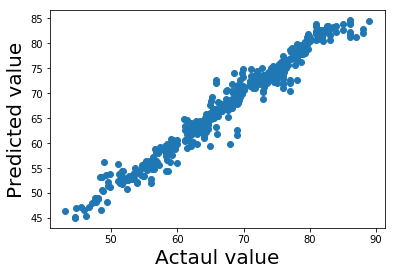

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test,random_forest_model_predict)
plt.xlabel("Actaul value", fontsize = 20)
plt.ylabel("Predicted value", fontsize = 20)
plt.show()

In [24]:
!pip install watson-machine-learning-client

In [25]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-17 16:38:34,922 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [26]:
wml_credentials={
  "apikey": "1CjEUVAocvKjP5E5xf4QMmRLO7BC24n2-Pu1zfN3yM1v",
  "instance_id": "11e12297-58f7-45b3-a56a-601ce1c018d4",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [27]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [28]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME: "Vidya",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "vidyasreekumar.mec@gmail.com",
    client.repository.ModelMetaNames.NAME: "Life Expectancy"
}

In [29]:
model_artifact = client.repository.store_model(random_forest_model, meta_props = model_props)

In [30]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'1b70b14e-c1cc-4df8-b64f-13bd416e16e1'

In [31]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
4abceb5f-e290-4005-88e7-697e4780f9c4  Life Expectancy  online  DEPLOY_SUCCESS  2020-06-17T09:37:52.854Z  scikit-learn-0.20  model
40d907a4-0a7b-4433-b395-83f13d54952f  Life Expectancy  online  DEPLOY_SUCCESS  2020-06-16T16:04:02.878Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [32]:
deployment = client.deployments.create(published_model_uid, name = "Life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: '1b70b14e-c1cc-4df8-b64f-13bd416e16e1' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1e8513fb-6df7-4317-a32d-cc9578f48c20'
------------------------------------------------------------------------------------------------




In [33]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/11e12297-58f7-45b3-a56a-601ce1c018d4/deployments/1e8513fb-6df7-4317-a32d-cc9578f48c20/online'